# 分散分析
ここでは３つ以上の平均値を比較するための統計的方法として、分散分析を紹介する。

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('../data/teaching_method.csv')

In [3]:
data.head()

,id,name,sex,math,stats,psychology_test,stats_test1,stats_test2,teaching_method
0,1,大村,男,嫌い,好き,13,6,10,C
1,2,本多,男,嫌い,好き,14,10,13,B
2,3,川崎,男,好き,好き,7,6,8,B
3,4,多村,男,好き,好き,12,10,15,A
4,5,松中,男,嫌い,嫌い,10,5,8,B


In [4]:
A = data[data.teaching_method == 'A']
B = data[data.teaching_method == 'B']
C = data[data.teaching_method == 'C']
D = data[data.teaching_method == 'D']

In [5]:
A

,id,name,sex,math,stats,psychology_test,stats_test1,stats_test2,teaching_method
3,4,多村,男,好き,好き,12,10,15,A
6,7,柴原,男,嫌い,嫌い,8,5,9,A
10,11,高谷,女,好き,好き,9,11,18,A
11,12,杉内,女,嫌い,好き,6,6,14,A
12,13,和田,女,好き,好き,10,11,18,A


In [6]:
B

,id,name,sex,math,stats,psychology_test,stats_test1,stats_test2,teaching_method
1,2,本多,男,嫌い,好き,14,10,13,B
2,3,川崎,男,好き,好き,7,6,8,B
4,5,松中,男,嫌い,嫌い,10,5,8,B
14,15,大隣,女,嫌い,好き,5,7,12,B
18,19,佐藤,女,嫌い,嫌い,12,7,7,B


In [7]:
C

,id,name,sex,math,stats,psychology_test,stats_test1,stats_test2,teaching_method
0,1,大村,男,嫌い,好き,13,6,10,C
5,6,小久保,男,嫌い,嫌い,6,3,6,C
13,14,新垣,女,嫌い,嫌い,12,9,11,C
16,17,斎藤,女,嫌い,嫌い,8,8,7,C
17,18,柳瀬,女,嫌い,嫌い,8,7,12,C


In [8]:
D

,id,name,sex,math,stats,psychology_test,stats_test1,stats_test2,teaching_method
7,8,井手,男,嫌い,嫌い,15,9,10,D
8,9,田上,男,嫌い,嫌い,4,3,7,D
9,10,松田,男,好き,嫌い,14,3,3,D
15,16,水田,女,好き,嫌い,12,5,5,D
19,20,馬原,女,嫌い,嫌い,15,9,7,D


上記の表は指導法（４つの指導法で計20人）ごとの点数を表示してる。 ここでは20人の得点そのものではなく、それぞれの指導法をうける全ての母集団としたときに、その母集団において、それぞれの指導法ごとに求めたテスト得点の平均値に違いがあるかどうかということに関心があるとする。母集団ではこれら４つの指導法の間に平均値の差はあるのか？標本の群間で平均値の差はあると言っても、母集団で平均値に差があるとは必ずしも言えない。<b>この得られた標本が母平均の等しい4群から抽出される可能性が高いかどうかを検討するための検定が分散分析である。</b>分散分析という名前だが、平均値差の検定である（t検定は３つ以上の平均値差の検定には使えない）。

## 一元配置分散分析（対応なし）を実行する
統計的仮説検定の一般的な手順の通りに分散分析を実行する。分散分析は今まで検定とは複雑な計算のためライブラリを使って計算する。

### (1)帰無仮説と対立仮説の設定
- 帰無仮説$H_0$：4群の母平均は等しい（指導法の違いによる統計学の学習効果に差はない）
- 対立仮説$H_1$：4群の母平均は等しくない（指導法の違いによる統計学の学習効果に差がある）
<p>
ここで注意しなければならないのは、例えば4群のうち一つだけ母平均と異なる（その他３つは母平均と等しい）ような場合でも対立仮説が成立することである。
</p>

### (2)検定統計量の選択
分散分析では検定統計量として次のFを利用する
$$
F = \frac{群間平方和/群間の自由度}{群内平方和/群内の自由度}
$$
この検定統計量は帰無仮説のもとで、すなわち全ての群の母平均が等しいときにはF分布という確率分布に従う。F分布は自由度を２つ持つ。これは$df_1$と$df_2$と書かれたり、分子の自由度、分母の自由度と呼ばれたりする。F分布を書いてみる。下記は分子の自由度を3、分母の自由度を16のF分布を描いたものである。

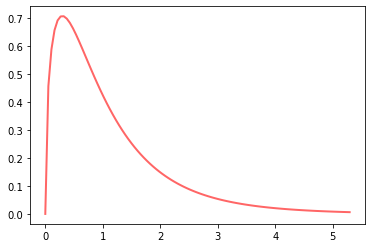

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
dfn = 3  #　分子の自由度
dfd = 16 # 分母の自由度 
x = np.linspace(stats.f.ppf(1e-10, dfn, dfd),stats.f.ppf(0.99, dfn, dfd), 100)
plt.plot(x, stats.f.pdf(x, dfn, dfd), 'r-', lw=2, alpha=0.6, label='f pdf')

### (3)有意水準$\alpha$の決定
ここでは有意水準は5%、つまり$\alpha=0.05$とする。上図のようF分布は正の値しか取らないため分散分析は常に片側検定となる。

### (4)検定統計量の実現値を求める
Pythonによる分散分析の関数は以下である。

In [10]:
from scipy import stats

In [11]:
f, p = stats.f_oneway(A.stats_test2,B.stats_test2,C.stats_test2,D.stats_test2)
print("F=%f, p-value = %f"%(f,p))

F=7.111111, p-value = 0.002988


### (5)帰無仮説の棄却or採択の決定
p値が5%以下のため帰無仮説は棄却される。

## 平方和の分解
ここでは平方和の分解について説明する。

In [12]:
data = pd.DataFrame([A.stats_test2.values, B.stats_test2.values, C.stats_test2.values, D.stats_test2.values]).T.values

In [13]:
data

array([[15, 13, 10, 10],
       [ 9,  8,  6,  7],
       [18,  8, 11,  3],
       [14, 12,  7,  5],
       [18,  7, 12,  7]])

In [14]:
group_mean = data.mean(axis=0) # 群平均

In [15]:
all_mean = data.mean() #全平均

In [16]:
all_mean_matrix = np.full((5,4), 10) # 全平均行列

In [17]:
group_mean_matrix = np.tile(group_mean, (5, 1)) # 群平均行列

In [18]:
# 全体 = データ - 全平均行列
a = data - all_mean_matrix

In [19]:
# 群間 = 群平均行列 - 全平均行列
# 各群ごとに全平均からどの程度離れているかを出す
g = group_mean_matrix - all_mean_matrix

In [20]:
g

array([[ 4.8, -0.4, -0.8, -3.6],
       [ 4.8, -0.4, -0.8, -3.6],
       [ 4.8, -0.4, -0.8, -3.6],
       [ 4.8, -0.4, -0.8, -3.6],
       [ 4.8, -0.4, -0.8, -3.6]])

上記は平均からの差なので指導法Aと使うと平均より4.8点押し上げられたと解釈できる。逆に指導法Bは平均点より-0.4のため引き下げられたとみることができる。このように条件の違いで平均点を押し上げたり引き下げたりする力を効果という。どの群も平均が同じであれば、この群間の値は全て0になるが、その場合は群の違いによって効果がないということである。したがって分散分析は母集団において群の違いによる効果の有無を検定する手法であるという見方ができる。

In [21]:
# 郡内 = 全データ - 群平均行列
g_in = data - group_mean_matrix

In [22]:
g_in

array([[ 0.2,  3.4,  0.8,  3.6],
       [-5.8, -1.6, -3.2,  0.6],
       [ 3.2, -1.6,  1.8, -3.4],
       [-0.8,  2.4, -2.2, -1.4],
       [ 3.2, -2.6,  2.8,  0.6]])

郡内という行列は全データのここの要素からその要素が属する群の平均を引いたもの。それぞれのデータがその群の平均からどれくらい離れているかを示している。もし、同じ群の中のデータが全て同じであれば、郡内は0になる。全員の得点が全平均から「群間」で見られた効果によって一律に押し上げられたり引き下げられたりしたあとで、「郡内」の値は指導法との相性やテストのときの体調など様々な要因によって生じた変動の大きさと見なすことができる。

In [23]:
a**2 # 各データが全平均に近いほど小さく、遠いほど大きくなる

array([[25,  9,  0,  0],
       [ 1,  4, 16,  9],
       [64,  4,  1, 49],
       [16,  4,  9, 25],
       [64,  9,  4,  9]])

In [24]:
g**2

array([[23.04,  0.16,  0.64, 12.96],
       [23.04,  0.16,  0.64, 12.96],
       [23.04,  0.16,  0.64, 12.96],
       [23.04,  0.16,  0.64, 12.96],
       [23.04,  0.16,  0.64, 12.96]])

In [25]:
g_in**2

array([[ 0.04, 11.56,  0.64, 12.96],
       [33.64,  2.56, 10.24,  0.36],
       [10.24,  2.56,  3.24, 11.56],
       [ 0.64,  5.76,  4.84,  1.96],
       [10.24,  6.76,  7.84,  0.36]])

In [26]:
a_sum = np.sum(a**2)
g_sum = np.sum(g**2)
g_in_sum = np.sum(g_in**2)

In [27]:
a_sum # データ全体のばらつき

322

In [28]:
g_sum # 群の平均値のばらつきが大きいほど大きい値になる。群の違いによって生じるばらつき

184.00000000000003

In [29]:
g_in_sum # 同じ群の中の個人差の大きさを表す

138.0

群の平均値の違いをデータのばらつきによって説明しようとするのが分散分析である。
* 群間の自由度=群の数-1
* 郡内の自由度=(各群のデータ数-1)を全ての群について合計したもの
* 全体の自由度=全データ数-1

In [43]:
g_df = data.shape[1] - 1 # 群間自由度
g_in_df = (data.shape[0] - 1)*data.shape[1] # 郡内自由度
a_df = data.shape[0]*data.shape[1] - 1 # 全体自由度

In [44]:
print(g_df)
print(g_in_df)
print(a_df)

3
16
19


In [45]:
g_mean = g_sum / g_df # 群間平均平方
g_in_mean = g_in_sum / g_in_df # 群間平均平方
a_mean = a_sum / a_df

In [46]:
print(g_mean)
print(g_in_mean)
print(a_mean)

61.33333333333334
8.625
16.94736842105263


検定統計量Fを求める
* 分子=（群間平方和）/（群間の自由度）=群間の平均平方
* 分母=（群内平方和）/（群内の自由度）=群内の平均平方

In [51]:
F = g_mean / g_in_mean
F

7.1111111111111125

## 多重比較（Tukeyの方法）
<p>一元配置分散分析（対応なし）で行った検定では「４つの指導法の母平均は等しくない」ということが分かったが、具体的にどの指導法とどの指導法の間に差があるかまではわからない。このために多重比較という方法を用いる必要がある。ここではTukey(テューキー)の方法と呼ばれる多重比較の方法を示す。</p>
<p>各群におけるデータ数nが等しく、各群の母分散も等しいと仮定して次式により検定統計量qを求める</p>
$$
q = \frac{|比較する群の平均値差|}{\sqrt{郡内の平均平方/各群のデータ数}}
$$
指導法データの例で、AとDを比較してみよう。